# Wordcloud of top Words in Wine Reviews

## Load data

In [1]:
from collections import namedtuple
import pandas as pd
import numpy as np

from IPython.display import Markdown, display

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [13]:
corpus = pd.read_parquet('files/wine_review.parquet.gzip', columns=['preprocessed_description']).preprocessed_description
corpus.info()
corpus

<class 'pandas.core.series.Series'>
Index: 100538 entries, 0 to 129970
Series name: preprocessed_description
Non-Null Count   Dtype 
--------------   ----- 
100538 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


0           aroma include tropical fruit broom brimstone...
1         do ripe fruity wine smooth structure firm tann...
2         rainstorm tart snappy flavor lime flesh rind d...
3         pineapple rind lemon pith orange blossom start...
4         vintner like regular bottling come rough tanni...
                                ...                        
129966    note honeysuckle cantaloupe sweeten deliciousl...
129967    citation citation give decade bottle age prior...
129968    drain gravel soil give wine crisp dry characte...
129969    dry style crisp acidity weight solid powerful ...
129970    dit big rich dry power intense spiciness round...
Name: preprocessed_description, Length: 100538, dtype: object

## Wordcloud Helper

In [24]:
import wordcloud as wc
from PIL import Image

# helper Function for display frequency of words
def freq_words(words, title=None, show_v=False, mask_file='images/Wineglass.png'):
  '''
  Show frequency of words as an image
  '''

  stopwords = set(wc.STOPWORDS)
  stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

  # Generate frequency of words as an image
  mask = np.array(Image.open(mask_file))
  print(mask.shape)
  freq_words_img = wc.WordCloud(mask=mask, stopwords=stopwords, background_color='black', margin = 0, colormap='BuPu_r', width=2*mask.shape[1],height=2*mask.shape[0], max_words=2500).generate(words)

  # print the vector of words extracted from the description
  if show_v:
    print(freq_words_img.words_)

  # Display the image
  plt.figure(figsize=(10, 10))
  if title is not None:
    plt.title(title)
  plt.imshow(freq_words_img, interpolation="bilinear")
  plt.axis("off")
  plt.tight_layout()
  plt.show()


### Baseline
<p align="center">
<img src="images/Wineglass.png" alt="drawing" width="100"/>
</p>

(540, 960, 3)


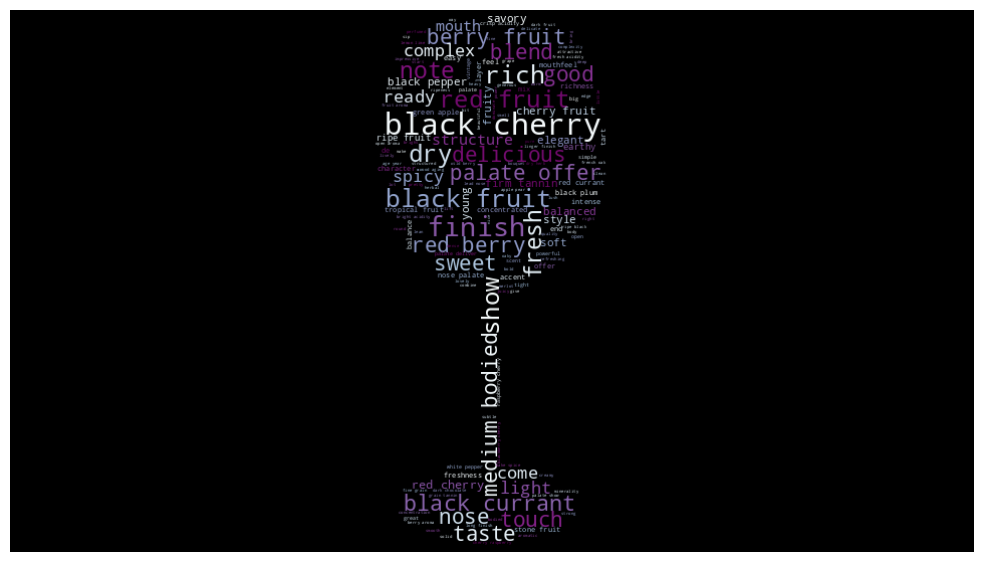

In [25]:
freq_words(' '.join(corpus))

## Alternate
<p align="center">
<img src="images/wine-icon-15975.jpg" alt="drawing" width="100"/>
</p>

(626, 626, 3)


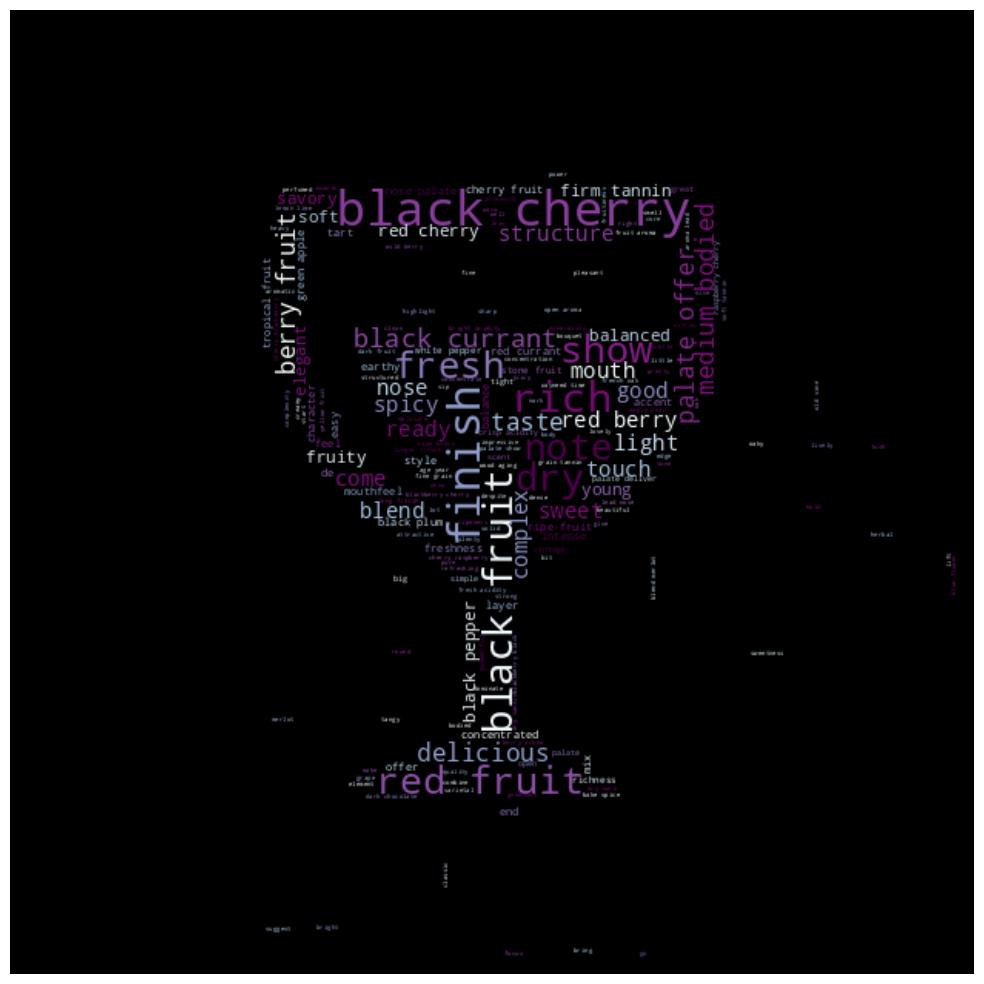

In [26]:
freq_words(' '.join(corpus), mask_file='images/wine-icon-15975.jpg')